In [79]:
from glob import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",100)

In [ ]:
# main_folder = "/kaggle/input/rsna-2023-abdominal-trauma-detection/"
# df = pd.read_parquet(main_folder + "train_dicom_tags.parquet")

# # StudyIDごとに行がユニークになるように削除
# df.drop(["ContentTime", "FrameOfReferenceUID", "ImagePositionPatient", "InstanceNumber", "SOPInstanceUID", "FileMetaInformationVersion", "MediaStorageSOPInstanceUID", "path"], axis=1, inplace=True)
# df = df.drop_duplicates()

# df["StudyID"] = df["SeriesInstanceUID"].str.replace("1.2.123.12345.1.2.3.", "").str.split(".").str[-1]
# df.drop(["BitsAllocated", "SeriesInstanceUID", "StudyInstanceUID", "PhotometricInterpretation", "SamplesPerPixel", "WindowCenter", "WindowWidth",
#         "ImplementationClassUID", "ImplementationVersionName", "MediaStorageSOPClassUID", "TransferSyntaxUID"], axis=1, inplace=True)  # ユニークな値が一つだけの列は削除

# df = df.reindex(columns=["PatientID", "StudyID", "Rows", "Columns", "SliceThickness", "PixelSpacing", "RescaleIntercept", "RescaleSlope", "BitsStored",
#                 "HighBit", "ContentDate", "ImageOrientationPatient", "KVP", "PixelRepresentation", "SeriesNumber", "PatientPosition", "RescaleType",])
# df = df.sort_values(by=["PatientID", "StudyID"]).reset_index(drop=True)
# df.to_csv("/kaggle/dataset/dicom_tags.csv", index=False)

In [73]:
len(glob("/kaggle/input/rsna-2023-abdominal-trauma-detection/train_images/*/*"))


4711

In [76]:
df=pd.read_csv("/kaggle/dataset/dicom_tags.csv")
df

,PatientID,StudyID,Rows,Columns,SliceThickness,PixelSpacing,RescaleIntercept,RescaleSlope,BitsStored,HighBit,ImageOrientationPatient,KVP,PixelRepresentation,SeriesNumber,PatientPosition,RescaleType
0,10004,21057,512,512,1.0,"[0.89453125, 0.89453125]",-1024.0,1.0,12,11,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]",90.0,0,16,HFS,HU
1,10004,51033,512,512,1.0,"[0.9511719, 0.9511719]",-1024.0,1.0,12,11,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]",90.0,0,9,HFS,HU
2,10005,18667,512,512,5.0,"[0.787109, 0.787109]",-1024.0,1.0,16,15,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]",120.0,1,2,HFS,HU
3,10007,47578,512,512,5.0,"[0.771484, 0.771484]",-1024.0,1.0,16,15,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]",120.0,1,3,HFS,HU
4,10026,29700,512,582,1.0,"[0.5859381443, 0.5859375]",-8192.0,1.0,16,15,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]",130.0,0,0,HFS,HU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4766,9961,2003,512,512,1.0,"[0.961, 0.961]",0.0,1.0,16,15,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]",120.0,1,6,FFS,NaN
4767,9961,63032,512,512,1.0,"[0.965, 0.965]",0.0,1.0,16,15,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]",120.0,1,13,FFS,NaN
4768,9980,40214,512,512,3.0,"[0.890625, 0.890625]",-1024.0,1.0,12,11,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]",120.0,0,301,HFS,NaN
4769,9980,40466,512,512,3.0,"[0.81640625, 0.81640625]",-1024.0,1.0,12,11,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]",120.0,0,201,HFS,NaN


In [75]:
df.nunique()

PatientID                  3147
StudyID                    4771
Rows                          6
Columns                     136
SliceThickness               15
PixelSpacing                807
RescaleIntercept              4
RescaleSlope                  1
BitsStored                    3
HighBit                       3
ImageOrientationPatient     164
KVP                          10
PixelRepresentation           2
SeriesNumber                134
PatientPosition               2
RescaleType                   2
dtype: int64

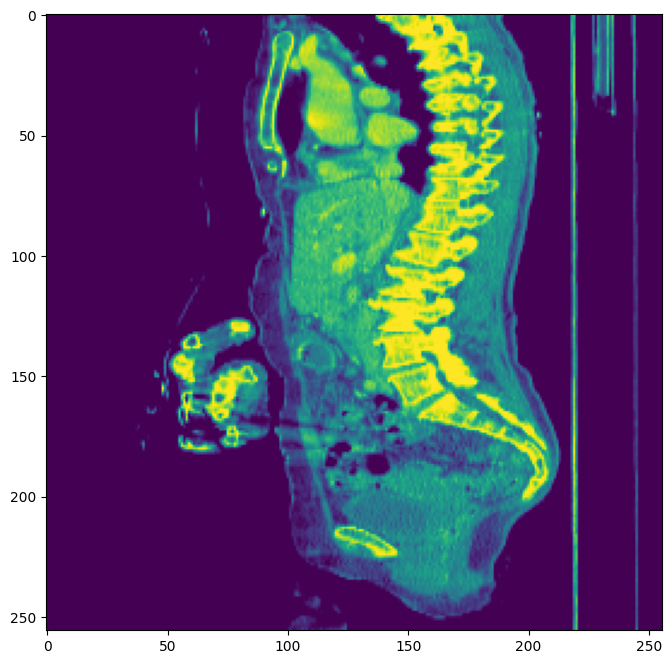

In [80]:
volume_dir = "/kaggle/dataset/volume_256"
# 10104_27573
# 10082_8139
npy_path = volume_dir+"/10104_27573.npy"
plt.figure(figsize=(8, 8))
plt.imshow(np.load(npy_path)[:, :, 128])


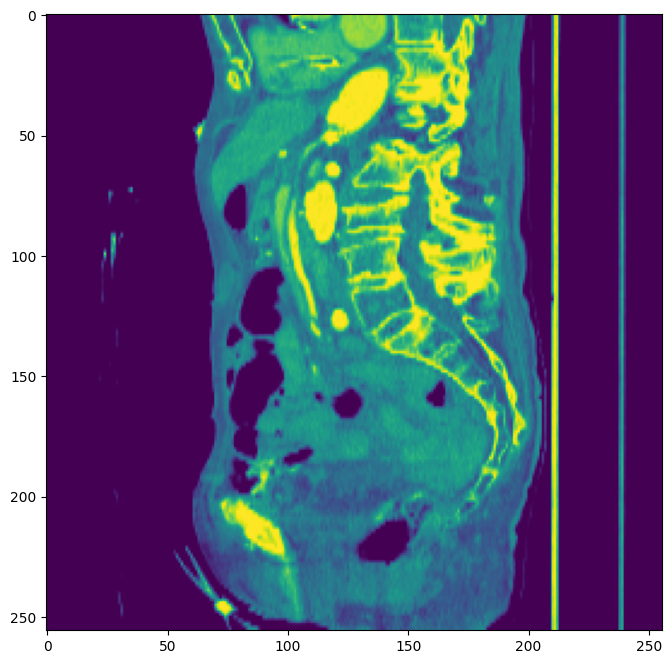

In [81]:
volume_dir = "/kaggle/dataset/volume_256"
npy_path = volume_dir+"/10082_8139.npy"
plt.figure(figsize=(8, 8))
plt.imshow(np.load(npy_path)[:, :, 128])


In [78]:
np.unique(df["Rows"])

array([ 482,  492,  496,  510,  512, 1024])